In [1]:
import tensorflow as tf
import os
import cv2

In [2]:
daily_sales = [23, 34, 4, 5, 5, 66, 6, 98]

In [3]:
dataset = tf.data.Dataset.from_tensor_slices(daily_sales)
list(dataset.as_numpy_iterator())


[23, 34, 4, 5, 5, 66, 6, 98]

In [4]:
for u in dataset.as_numpy_iterator():
    print(type(u))

<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'numpy.int32'>


In [5]:
filtered = dataset.filter(lambda x: x> 23)
for u in filtered.as_numpy_iterator():
    print(u)

34
66
98


In [6]:
filtered_mapsed = filtered.map(lambda x: x * 2)
for u in filtered_mapsed.as_numpy_iterator():
    print(u)

68
132
196


In [7]:
for u in dataset.batch(2).as_numpy_iterator():
       print(type(u))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [8]:
dataset = tf.data.Dataset.from_tensor_slices(daily_sales)
dataset = dataset.filter(lambda x: x> 23).map(lambda x: x * 2).shuffle(2).batch(2)
for u in dataset.as_numpy_iterator():
    print(u)

Cause: could not parse the source code of <function <lambda> at 0x0000022D14577060>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
lambda x: x * 2

Match 1:
lambda x: x > 23

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x0000022D14577060>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
lambda x: x * 2

Match 1:
lambda x: x > 23

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x0000022D14576DE0>: found multiple definitions with identical signature

In [9]:
images_data_set = tf.data.Dataset.list_files("data/*/*", shuffle=True)
        
images_data_set


<_ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [10]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [11]:
data_dir = 'data'

In [12]:
data_images = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 371 files belonging to 4 classes.


In [13]:

batch = data_images.as_numpy_iterator().next()
len(batch)
data_images.class_names
# batch[0].shape
# batch [1]

['Angry', 'Other', 'Sad', 'happy']

In [14]:
data_images= data_images.map(lambda x, y : (x/255, tf.one_hot(y, depth = 4)))
data_images

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [15]:
train_size = int(len(data_images)*0.7)
val_size = int(len(data_images)*0.3)
train_size + val_size

11

In [16]:
training_ds = data_images.take(train_size)
val_ds = data_images.skip(train_size).take(val_size)
# testing_ds = data_images.skip(train_size+val_size).take(test_size)
data_images.as_numpy_iterator().next()[1].shape

(32, 4)

In [17]:
training_ds

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [18]:

batch[1].shape

(32,)

In [19]:
batch[0].shape

(32, 256, 256, 3)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Reshape,BatchNormalization

In [21]:
model = Sequential()

In [22]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='sigmoid'))

In [23]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [25]:
logdir='logs'

In [26]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [27]:
hist = model.fit(training_ds, epochs=32, validation_data=val_ds, callbacks=[tensorboard_callback])

Epoch 1/32
8/8 [==============================] - 15s 1s/step - loss: 0.5878 - accuracy: 0.3281 - val_loss: 0.5497 - val_accuracy: 0.3958
Epoch 2/32
8/8 [==============================] - 14s 1s/step - loss: 0.5417 - accuracy: 0.4141 - val_loss: 0.5620 - val_accuracy: 0.3854
Epoch 3/32
8/8 [==============================] - 14s 1s/step - loss: 0.5405 - accuracy: 0.4648 - val_loss: 0.5109 - val_accuracy: 0.4896
Epoch 4/32
8/8 [==============================] - 13s 1s/step - loss: 0.5153 - accuracy: 0.4570 - val_loss: 0.4842 - val_accuracy: 0.5938
Epoch 5/32
8/8 [==============================] - 12s 1s/step - loss: 0.4782 - accuracy: 0.5625 - val_loss: 0.4491 - val_accuracy: 0.6042
Epoch 6/32
8/8 [==============================] - 13s 1s/step - loss: 0.4342 - accuracy: 0.5898 - val_loss: 0.3980 - val_accuracy: 0.5833
Epoch 7/32
8/8 [==============================] - 13s 1s/step - loss: 0.4030 - accuracy: 0.6406 - val_loss: 0.3597 - val_accuracy: 0.6979
Epoch 8/32
8/8 [==================

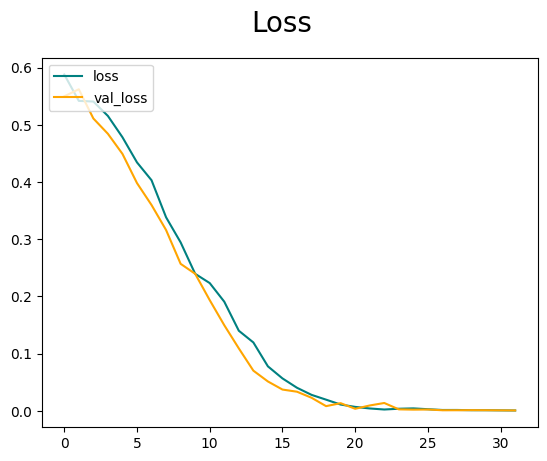

In [36]:
from matplotlib import pyplot as plt
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

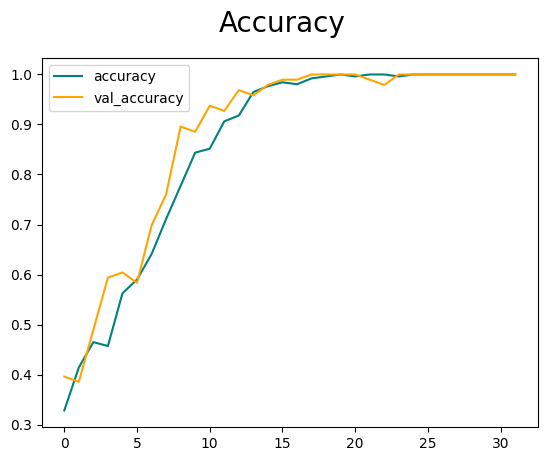

In [37]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [38]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [39]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [40]:
for batch in val_ds.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 213ms/step


In [41]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


1/1 [==============================] - 0s 33ms/step


array([0., 1., 0., 0.], dtype=float32)

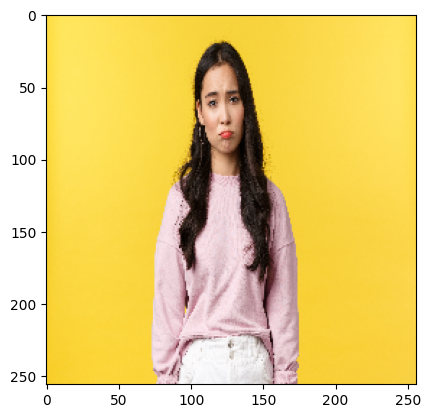

In [46]:
import numpy as np
from keras.preprocessing import image
# Input image
test_image = image.load_img(
    f'test_images/emotions.jpg', target_size=(256, 256))

# For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
result[0]

In [47]:
cat_names = ['Angry', 'happy', 'Other', 'Sad']
score = tf.nn.softmax(result[0])
print(list(cat_names)[np.argmax(score)])

percent_of_confidence = None
for u in range(len(cat_names)):
    for k in range(len(result[0])):
        if (cat_names[u] == list(cat_names)[np.argmax(score)]):
            percent_of_confidence =result[0][u] *100

print(
    f"This image most likely belongs to {list(cat_names)[np.argmax(score)]} with a {percent_of_confidence} percent confidence."
   
)

happy
This image most likely belongs to happy with a 100.0 percent confidence.


In [48]:
model.save("emotion_detection.h5")

C:\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
